## Option 1: Pyber

![Ride](Images/Ride.png)

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

As final considerations:

* You must use the Pandas Library and the Jupyter Notebook.
* You must use the Matplotlib library.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
* Remember when making your plots to consider aesthetics!
  * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
  * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
* See [Starter Workbook](Pyber/pyber_starter.ipynb) for a reference on expected format.

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
# Combine the data into a single dataset
ride_df = pd.read_csv(ride_data_to_load)


In [2]:
# set types
ride_df = ride_df.astype({'fare':float})
pd.options.display.float_format = '${:,.2f}'.format

# Display the data table for preview
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,$13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,$30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,$33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,$23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,$34.58,3908451377344


In [3]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
# Your objective is to build a Bubble Plot that showcases the relationship between four key variables:

# Average Fare ($) Per City
fare_groupby = ride_df.groupby('city')
avg_fare_city = fare_groupby['fare'].mean()

# Total Number of Rides Per City
rides_per_city = fare_groupby['city'].count()

r_f_df = pd.DataFrame({'Avg Fare':avg_fare_city,
                      'Total Rides':rides_per_city
                      })

# Total Number of Drivers Per City
new_city_df = city_df.set_index("city")

# City Type (Urban, Suburban, Rural)
# merges = pd.merge(r_f_df, city_df,sort=True, how='left', right_on='city', left_index=True)
# merges
merges = pd.merge(r_f_df, new_city_df,sort=True, how='left', right_index=True, left_index=True)
merges.head()


,Avg Fare,Total Rides,driver_count,type
city,,,,
Amandaburgh,$24.64,18,12,Urban
Barajasview,$25.33,22,26,Urban
Barronchester,$36.42,16,11,Suburban
Bethanyland,$32.96,18,22,Suburban
Bradshawfurt,$40.06,10,7,Rural


## Bubble Plot of Ride Sharing Data

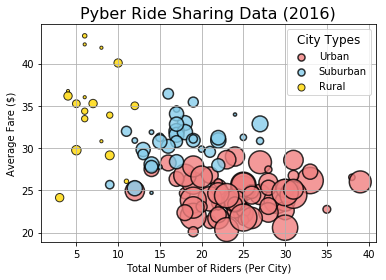

In [5]:
# Obtain the x and y coordinates for each of the three city types
# for guide on bubble plots
# https://python-graph-gallery.com/272-map-a-color-to-bubble-plot/
# https://pythonspot.com/matplotlib-scatterplot/

# filter (locate) dataframes by each city types.
urban = merges.loc[merges['type'] == 'Urban', ['Avg Fare','Total Rides', 'driver_count']]
suburban = merges.loc[merges['type'] == 'Suburban', ['Avg Fare','Total Rides', 'driver_count']]
rural = merges.loc[merges['type'] == 'Rural', ['Avg Fare','Total Rides', 'driver_count']]

# Build the scatter plots for each city types
# Incorporate the other graph properties
# s is the z axis for getting driver count size(circle sizes
urban_plot = plt.scatter(urban['Total Rides'], urban['Avg Fare'], s=urban['driver_count']*10, c='lightcoral', alpha=0.8, edgecolors="black", label='Urban', linewidth=1.5)
suburban_plot = plt.scatter(suburban['Total Rides'], suburban['Avg Fare'], s=suburban['driver_count']*10, c='skyblue', alpha=0.8, edgecolors="black", label='Suburban', linewidth=1.5)
rural_plot = plt.scatter(rural['Total Rides'], rural['Avg Fare'], s=rural['driver_count']*10, c='gold', alpha=0.8, edgecolors="black", label='Rural', linewidth=1)


# Create a legend
legend = plt.legend(handles=[urban_plot, suburban_plot, rural_plot],title='City Types',prop={'size':10}, loc="best")
legend.legendHandles[0]._sizes =[50]
legend.legendHandles[1]._sizes =[50]
legend.legendHandles[2]._sizes =[50]
legend.get_title().set_fontsize('12')
plt.grid(b=True)
plt.title('Pyber Ride Sharing Data (2016)', loc="center",fontdict={'fontsize':16})
plt.xlabel('Total Number of Riders (Per City)')
plt.ylabel('Average Fare ($)')

# Save Figure
save = plt.savefig('Pyber Rider Sharing Data 2016.png')

# Show the chart
plt.show()


## Total Fares by City Type

In [6]:
#merge dataframes
raw_merge = pd.merge(ride_df, city_df, how='left',on=['city','city'])
raw_merge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,$13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,$30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,$33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,$23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,$34.58,3908451377344,46,Urban


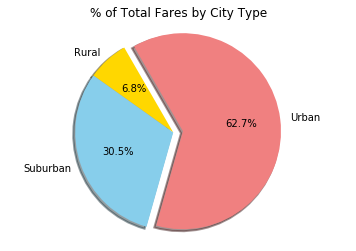

In [7]:
# Calculate Type Percents
total_fares_all = ride_df['fare'].sum()
total_fares_gb = raw_merge.groupby('type')
total_fares_type = total_fares_gb['type'].first()
total_fares_cities = total_fares_gb['fare'].sum()
total_fares_percents = total_fares_cities / total_fares_all * 100

# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(total_fares_percents, explode=(0,0,0.1), labels=total_fares_type, colors=["gold", "skyblue", "lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=120,
       wedgeprops={'linewidth':2})
plt.axis("equal")
plt.savefig('Total Fares by City Type.png')
plt.show()


## Total Rides by City Type

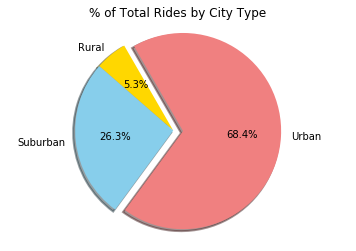

In [8]:
# Calculate Ride Percents
total_rides_all = ride_df['ride_id'].count()
total_rides_gb = raw_merge.groupby('type')
total_rides_type = total_fares_gb['type'].first()
total_rides_cities = total_fares_gb['ride_id'].count()
total_rides_percents = total_rides_cities / total_rides_all * 100

# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(total_rides_percents, explode=(0,0,0.1), labels=total_rides_type, colors=["gold", "skyblue", "lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=120,
       wedgeprops={'linewidth':2})
plt.axis("equal")
plt.savefig('Total Rides by City Type.png')
plt.show()



## Total Drivers by City Type

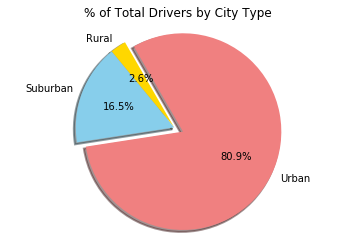

In [9]:
# Calculate Driver Percents
total_drivers_all = city_df['driver_count'].sum()
total_drivers_gb = city_df.groupby('type')
total_drivers_type = total_drivers_gb['type'].first()
total_drivers_cities = total_drivers_gb['driver_count'].sum()
total_drivers_percents = total_drivers_cities / total_drivers_all * 100

# Build Pie Chart
plt.title("% of Total Drivers by City Type")
plt.pie(total_drivers_percents, explode=(0,0,0.1), labels=total_drivers_type, colors=["gold", "skyblue", "lightcoral"],
        autopct="%1.1f%%", shadow=True, startangle=120,
       wedgeprops={'linewidth':2})
plt.axis("equal")
plt.savefig('Total Drivers by City Type.png')
plt.show()


In [14]:
# You must include a written description of three observable trends based on the data.
print('Data Analysis Results Trends')
print('1. Based on the Bubble Plot, there is a tendency for higher number of riders in the Urban city type, but with lower average fares.')
print('2. Based on the three pie charts the majority of total drivers, number of rides and total fares are from the Urban city type.')
print('3. Based on the bubble Plot, there is a tendency for high average fares in rural areas since there are lower amounts of drivers and rides.')

Data Analysis Results Trends
1. Based on the Bubble Plot, there is a tendency for higher number of riders in the Urban city type, but with lower average fares.
2. Based on the three pie charts the majority of total drivers, number of rides and total fares are from the Urban city type.
3. Based on the bubble Plot, there is a tendency for high average fares in rural areas since there are lower amounts of drivers and rides.
